### Implementing the method in Python

In [16]:
import numpy as np
import matplotlib.pyplot as plt

class CPCA(object):
    def __init__(self, alpha = 1, n_components=2):
        self.n_components = n_components
        self.alpha = alpha

    def fit_transform(self, foreground, background, active_labels = None):
        if not(foreground.shape==background.shape):
            raise ValueError('foreground and background datasets must have the same dimensions')

        transformed_data = self.perform_cpca(foreground, background)

        plt.figure()
        plt.title('CPCA Graph, with alpha='+str(self.alpha))
        plt.scatter(transformed_data[:,0],transformed_data[:,1], c=active_labels)
        plt.show()


    def perform_cpca(self, foreground, background):        
        # Calculate the covariance matrices
        self.bg_cov = background.T.dot(background)
        self.fg_cov = foreground.T.dot(foreground)

        sigma = self.fg_cov - self.alpha*self.bg_cov
        eigenValues, eigenVectors = np.linalg.eig(sigma)
        
        # Top (n_components) eigenvalues
        topNEigenValues = (-eigenValues).argsort()[:self.n_components]
        # Corresponding eigenvectors
        topEigenVector = eigenVectors[:, topNEigenValues]
        # Projected data
        projectedData = foreground.dot(topEigenVector)

        return projectedData

### Creating a synthetic dataset and applying the method to the synthetic data. Then Comparing with standard PCA.

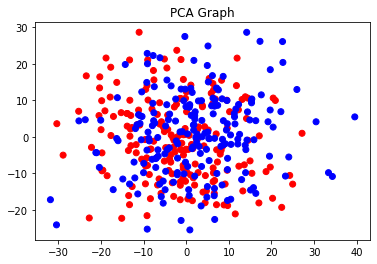

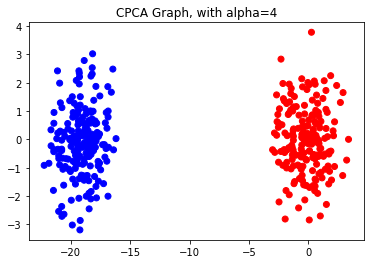

In [17]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt 
 
np.random.seed(42)

#########################
# Creating a synthetic dataset
#########################

# Data with 400 row, and 30 dimension
N = 400; D = 30; gap=3

# Background dataset
Bg = np.zeros((N, D))
Bg[:,0:10] = np.random.normal(0,10,(N,10))
Bg[:,10:20] = np.random.normal(0,3,(N,10))
Bg[:,20:30] = np.random.normal(0,1,(N,10))

# Foreground dataset
Fg = np.zeros((N, D))
Fg[:,0:10] = np.random.normal(0,10,(N,10))
# group 1
Fg[0:200, 10:20] = np.random.normal(0,1,(200,10))
Fg[0:200, 20:30] = np.random.normal(0,1,(200,10))
# group 2
Fg[200:400, 10:20] = np.random.normal(2*gap,1,(200,10))
Fg[200:400, 20:30] = np.random.normal(0,1,(200,10))

# The labels for the scatter plot
labels = ['red'] * 200 + ['blue'] * 200

#########################
# Perform PCA on the foreground dataset
#########################
pca = PCA()
pca_data = pca.fit_transform(Fg)
 
# Makes plot using PC1 and PC2
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels)
plt.title('PCA Graph')
plt.show()

#########################
# Perform CPCA on both the foreground, and background datasets
#########################
cpca = CPCA(alpha=4)
cpca.fit_transform(Fg, Bg, active_labels=labels)
